In [1]:
import string
import numpy as np
import pandas as pd
import re
from gensim.parsing.preprocessing import remove_stopwords
import gensim
from nltk.stem import LancasterStemmer
import random
from pprint import pprint

### Load newsgroups corpus and preprocess..

In [2]:
MAX_DOCS = 5000

# Reads csv file and generates an index operation for each line
df = pd.read_json('https://raw.githubusercontent.com/selva86/datasets/master/newsgroups.json')

# Convert to list and sample...
data = random.sample(df.content.values.tolist(), min(MAX_DOCS, len(df)))

# Remove Emails
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]
# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]
# Remove distracting single quotes
data = [re.sub("\'", "", sent) for sent in data]

# To lowercase
data = [sent.lower() for sent in data]

# filter out stop words & tokenize
data = [gensim.utils.simple_preprocess(str(remove_stopwords(sent)), deacc=True) for sent in data]

In [3]:
# stem
data = [[LancasterStemmer().stem(x) for x in sent] for sent in data]

In [4]:
print(data[0])

['from', 'kenne', 'alvin', 'subject', 're', 'ass', 'hel', 'org', 'univers', 'colorado', 'bould', 'lin', 'artic', 'writ', 'hav', 'acceiv', 'jes', 'savy', 'yo', 'tak', 'aw', 'chant', 'jehovah', 'wit', 'who', 'long', 'frequ', 'door', 'you', 'right', 'wrong', 'liv', 'good', 'lif', 'die', 'and', 'ceas', 'ex', 'right', 'wrong', 'die', 'suff', 'etern', 'damn', 'dont', 'mean', 'fun', 'point', 'lik', 'dirty', 'harry', 'said', 'youv', 'got', 'ask', 'yourself', 'feel', 'lucky', 'you', 'man', 'got', 'know', 'limit', 'dont', 'whosoev', 'wont', 'ridic', 'argu', 'christian', 'then', 'consid', 'switch', 'christianity', 'relig', 'off', 'fright', 'describ', 'hel', 'christians', 'think', 'view', 'strictly', 'ins', 'policy', 'know', 'believ', 'mess', 'lov', 'compass', 'oth', 'fai', 'bas', 'fear', 'hel', 'sound', 'lik', 'dysfunct', 'rel', 'god', 'lik', 'child', 'cring', 'fear', 'par', 'phys', 'viol', 'relig', 'concret', 'view', 'heav', 'hel', 'threats', 'persuas', 'wher', 'competit', 'envison', 'worst', 'h

In [5]:
print(data[1])

['from', 'scot', 'wood', 'subject', 're', 'western', 'digit', 'hd', 'info', 'nee', 'org', 'oakland', 'univers', 'rochest', 'michig', 'lin', 'nntp', 'post', 'host', 'vel', 'ac', 'oakland', 'edu', 'hol', 'ks', 'writ', 'my', 'western', 'digit', 'set', 'pin', 'back', 'anoth', 'hard', 'driv', 'set', 'jump', 'writ', 'right', 'on', 'circuit', 'board', 'wd', 'driv', 'ma', 'sl', 'wel', 'fig', 'jump', 'go', 'diff', 'problem', 'perplex', 'lik', 'wouldnt', 'know', 'driv', 'work', 'format', 'hardw', 'instal', 'problem', 'is', 'boot', 'sequ', 'want', 'pass', 'look', 'driv', 'goe', 'fin', 'bio', 'config', 'necess', 'driv', 'test', 'work', 'thing', 'com', 'driv', 'disk', 'pres', 'spin', 'insert', 'disk', 'driv', 'howev', 'work', 'fin', 'boot', 'ie', 'instal', 'softw', 'addit', 'help', 'welcom', 'swood', 'hunt', 'michig', 'dont', 'despair', 'clos', 'season', 'on', 'oposs', 'porcupin', 'weasel', 'red', 'squirrel', 'skunk', 'starl', 'fer', 'pigeon', 'engl', 'sparrow', 'ground', 'squirrel', 'woodchuck', '

### Prepare corpus using GenSim 

In [6]:
import gensim.corpora as corpora

# Create Dictionary of words
id2word = corpora.Dictionary(data)

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data]

In [7]:
print(corpus[0])   # this shows a list of word,freq 

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 2), (28, 1), (29, 2), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 2), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 2), (45, 1), (46, 1), (47, 1), (48, 1), (49, 5), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 2), (57, 1), (58, 3), (59, 1), (60, 1), (61, 1), (62, 1), (63, 2), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 2), (81, 1), (82, 1), (83, 2), (84, 1), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 1), (96, 2), (97, 1), (98, 1), (99, 1), (100, 1), (101, 1), (102, 1), (103, 1), (104, 1), (105, 1), (106, 2), (107, 1), (108, 2), (109, 2), (110, 1)]

### show info

In [8]:
M = len(id2word)
N = len(corpus)
print(f"there are {len(id2word)} words and {len(corpus)} documents")

there are 36538 words and 5000 documents


### show some words...

In [9]:
for w in range(10):
    print(f"first words: {id2word[w]}")
for w in range(M-10,M):
    print(f"last words: {id2word[w]}")

first words: acceiv
first words: alvin
first words: and
first words: argu
first words: artic
first words: ask
first words: ass
first words: aw
first words: bas
first words: believ
last words: hakim
last words: jhsegal
last words: midl
last words: molotov
last words: raajid
last words: ramadh
last words: riyad
last words: rouhy
last words: saamud
last words: wiscon


# 1. LSA

In [10]:
X = np.zeros([N,M])
for d, doc in enumerate(corpus):
    for (j, f) in doc:
        X[d,j] = f

### Now run SVD on matrix X

In [11]:
from scipy import linalg
U,sigma,V = linalg.svd(X, full_matrices=False)


In [12]:
K = 2
U2 = U[:, 0:K]
V2 = V[0:K, :]
sigma2 = np.diag(sigma[0:K])
print(U2.shape, sigma2.shape, V2.shape)


(5000, 2) (2, 2) (2, 36538)


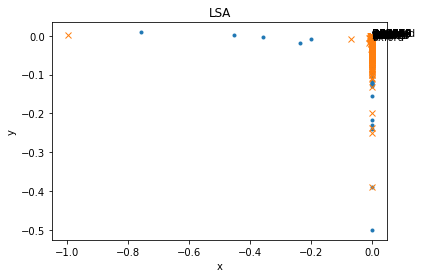

In [13]:
from matplotlib import pyplot
import pylab
from random import sample

pyplot.title("LSA")
pyplot.xlabel(u'x')
pyplot.ylabel(u'y')

for i in sample(range(len(U2)), 20):
    pylab.text(U2[i][0], U2[i][1],  id2word[i], fontsize=10)
x = U2.T[0]
y = U2.T[1]
pylab.plot(x, y, '.')

for i in sample(range(len(V2[0])), 20):
    pylab.text(V2[0][i], V2[1][i], ('D%d' %(i+1)), fontsize=10)
x = V[0]
y = V[1]
pylab.plot(x, y, 'x')


# pLSA

In [14]:
K=20

### set up counts

In [15]:
nd = np.zeros([N])   # counts per document
n = np.zeros([N,M])  # counts per document, word
for d, doc in enumerate(corpus):
    for (j,f) in doc:
        n[d,j] = f
        nd[d] += f

### initialize parameters randomly

In [16]:
def init_rand():
    # theta[d, k] : p(z=k|d)
    theta = np.random.rand(N, K)
    d_sums = theta.sum(axis = 1)
    theta /= d_sums[:, np.newaxis]

    # beta[k, w] : p(w|z=k)
    beta = np.random.rand(K, M)
    w_sums = beta.sum(axis = 1)
    beta /= w_sums[:, np.newaxis]

    return theta, beta

### E-step

In [17]:
def EStep(theta, beta):
    
    # post[k,d,w] : p(z=k|d,w) posterior of latent z!    
    _post = np.full((K,N,M), 1/K)
    
    for d, doc in enumerate(corpus):
        for j,_ in doc:
            for k in range(0, K):
                _post[k, d, j] =  theta[d, k]*beta[k, j]
    # now, we normalize using first axis..
    k_sums = _post.sum(axis = 0)
    _post /= k_sums[np.newaxis,:,:]

    return _post

### M-step

In [18]:
def MStep(post):
    
    # re-estimate theta
    _theta = np.zeros([N, K])
    for k in range(0, K):
        for d, doc in enumerate(corpus):
            for j, f in doc:
                _theta[d,k] += f * post[k,d,j]
        for d in range(0,N):
            _theta[d,k] /= nd[d]

    # re-estimate beta
    _beta = np.zeros([K, M])
    for k in range(0,K):
        for d, doc in enumerate(corpus):
            for j, f in doc:
                _beta[k,j] += f * post[k,d,j]
    # now normalize by axis = 1
    w_sums = _beta.sum(axis = 1)
    _beta /= w_sums[:, np.newaxis]
    
    return _theta, _beta

### Log-likelihood

In [19]:
def LogLikelihood(theta, beta):
    tmp = 0
    for d, doc in enumerate(corpus):
        for j, f in doc:
            tmp += f * np.log(theta[d,:].dot(beta[:,j]))
    print(f'loglikelihood: {tmp:.1f}')

### EM algorithm

In [ ]:
import time

theta, beta = init_rand()
LogLikelihood(theta,beta)
start = time.time()
for i in range(0, 10):
    t = time.time()
    post = EStep(theta,beta)
    theta,beta = MStep(post)
    elapsed = time.time() - t
    
    print(f"iteration {i} took {elapsed:.2f} s.")
    LogLikelihood(theta,beta)
print(f"EM took {time.time()-start:.2f} s.")


loglikelihood: -8118683.6
iteration 0 took 1049.18 s.
loglikelihood: -6223760.8
iteration 1 took 1422.91 s.
loglikelihood: -6194849.2


### inspect topics

In [ ]:
all_topics = []
for k in range(K):
    topic = []
    ids = (-beta[k, :]).argsort()
    topic = [(id2word[j], beta[k,j]) for j in ids]
    all_topics.append(topic[:20])

# print out topics:
for k, topic in enumerate(all_topics):
    print()
    print(f'topic {k+1}: {topic}')

# 3. LDA

In [ ]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [ ]:
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]